# Fatal Police Shootings

## Version Control

Version numbers of all used packages have been provided to assist in future troubleshooting.

In [1]:
# Required Packages and Imports: Python 3.12.1, numpy 1.26.4, pandas 2.2.1, matplotlib 3.8.3, seaborn 0.13.2

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True



## The Data

The following data comes from the Kaggle dataset Fatal Police Shootings in the US by Karolina Wullum. Included is data documenting fatal use of force by American police officers along with other potentially relevant factors such as median household income, poverty metrics, and citizen race.

### Import

In [2]:
# Import Data

MHI = pd.read_csv('MedianHouseholdIncome2015.csv', encoding='windows-1252')
PBPL = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding='windows-1252')
PCHS = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding='windows-1252')
PKUS = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')
RBC = pd.read_csv('ShareRaceByCity.csv', encoding='windows-1252')


# Verify Results with MHI

RBC



,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


### Review


For information, the included date format is DD/MM/YY.

The 'manner_of_death' always includes firearms in this data. I don't see value in the taser or not distinction for this project.

The use of 68 different values in 'armed' causes some loss of value when legal systems usually divide the topic into larger groups. In Oregon, there are Deadly Weapons (designed as a weapon) and Dangerous Weapons (being used as a weapon) but no further distinction. The value 'undetermined' has 117 instances, making it the fifth most common value, and is a counfounding factor for this study.

The 'race' data is incomplete to a significant portion. I don't want to lose 195 entries but any categorization is going to make that entry the fourth most common entry. I may remove it to prevent some data distortion.

The data lacks the information necessary to make 'body_camera' valuable in this context, though I do believe other studies of the effect of body cameras on force can be valuable.

In [3]:
# Review Primary DataFrame

PKUS



,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [4]:
# Primary DataFrame Information

PKUS.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
# Consider Manner of Death Value Counts

PKUS['manner_of_death'].value_counts()



manner_of_death
shot                2363
shot and Tasered     172
Name: count, dtype: int64

In [6]:
# Consider Armed Value Counts

PKUS['armed'].value_counts()



armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: count, Length: 68, dtype: int64

In [7]:
# Consider Armed Values

PKUS['armed'].unique()



array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [8]:
# Consider Race Value Counts

PKUS['race'].value_counts()



race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

In [9]:
# Consider Threat Level Value Counts

PKUS['threat_level'].value_counts()



threat_level
attack          1611
other            766
undetermined     158
Name: count, dtype: int64

In [10]:
# Consider Threat Level Value Counts

PKUS['flee'].value_counts()



flee
Not fleeing    1695
Car             385
Foot            294
Other            96
Name: count, dtype: int64

### Cleaning

In [11]:
# Copy Data for Cleaning (Best Practice)

PKUSC = PKUS.copy().drop(['manner_of_death', 'body_camera'], axis= 1)


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
0,3,Tim Elliot,02/01/15,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing
1,4,Lewis Lee Lembke,02/01/15,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing
2,5,John Paul Quintero,03/01/15,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing
3,8,Matthew Hoffman,04/01/15,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing
4,9,Michael Rodriguez,04/01/15,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing
...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing
2531,2813,TK TK,28/07/17,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car
2532,2818,Dennis W. Robinson,29/07/17,gun,48.0,M,NaN,Melba,ID,False,attack,Car
2533,2817,Isaiah Tucker,31/07/17,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car


#### Column: 'date'

In [12]:
# Set 'date' Column to datetime64 Type

PKUSC['date'] = PKUSC['date'].astype('datetime64[ns]')



#### Column: 'armed'

In [13]:
# Remove Rows Where 'armed' is 'undetermined'

PKUSC = PKUSC[PKUSC.armed != 'undetermined']


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
0,3,Tim Elliot,2015-02-01,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing
1,4,Lewis Lee Lembke,2015-02-01,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing
2,5,John Paul Quintero,2015-03-01,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing
3,8,Matthew Hoffman,2015-04-01,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing
4,9,Michael Rodriguez,2015-04-01,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing
...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing
2531,2813,TK TK,2017-07-28,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car
2532,2818,Dennis W. Robinson,2017-07-29,gun,48.0,M,NaN,Melba,ID,False,attack,Car
2533,2817,Isaiah Tucker,2017-07-31,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car


In [14]:
# Convert 'armed' Column to Binary Values, Retain Weapon Information as 'weapon'

PKUSC['weapon'] = PKUSC['armed']

PKUSC.loc[PKUSC['armed'] != 'unarmed', 'armed'] = 'armed'


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,weapon
0,3,Tim Elliot,2015-02-01,armed,53.0,M,A,Shelton,WA,True,attack,Not fleeing,gun
1,4,Lewis Lee Lembke,2015-02-01,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,gun
2,5,John Paul Quintero,2015-03-01,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,unarmed
3,8,Matthew Hoffman,2015-04-01,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,toy weapon
4,9,Michael Rodriguez,2015-04-01,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,nail gun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,armed,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,gun
2531,2813,TK TK,2017-07-28,armed,NaN,M,NaN,Albuquerque,NM,False,attack,Car,vehicle
2532,2818,Dennis W. Robinson,2017-07-29,armed,48.0,M,NaN,Melba,ID,False,attack,Car,gun
2533,2817,Isaiah Tucker,2017-07-31,armed,28.0,M,B,Oshkosh,WI,False,attack,Car,vehicle


In [15]:
# Convert armed / uanrmed to Boolean Values

PKUSC['armed'] = PKUSC['armed'].map({'armed': True, 'unarmed': False})


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,weapon
0,3,Tim Elliot,2015-02-01,True,53.0,M,A,Shelton,WA,True,attack,Not fleeing,gun
1,4,Lewis Lee Lembke,2015-02-01,True,47.0,M,W,Aloha,OR,False,attack,Not fleeing,gun
2,5,John Paul Quintero,2015-03-01,False,23.0,M,H,Wichita,KS,False,other,Not fleeing,unarmed
3,8,Matthew Hoffman,2015-04-01,True,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,toy weapon
4,9,Michael Rodriguez,2015-04-01,True,39.0,M,H,Evans,CO,False,attack,Not fleeing,nail gun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,True,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,gun
2531,2813,TK TK,2017-07-28,True,NaN,M,NaN,Albuquerque,NM,False,attack,Car,vehicle
2532,2818,Dennis W. Robinson,2017-07-29,True,48.0,M,NaN,Melba,ID,False,attack,Car,gun
2533,2817,Isaiah Tucker,2017-07-31,True,28.0,M,B,Oshkosh,WI,False,attack,Car,vehicle


#### Column: 'age'

In [16]:
# Fill Missing Values with age_mean

PKUSC['age'] = PKUSC['age'].fillna(PKUSC['age'].mean())


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,weapon
0,3,Tim Elliot,2015-02-01,True,53.000000,M,A,Shelton,WA,True,attack,Not fleeing,gun
1,4,Lewis Lee Lembke,2015-02-01,True,47.000000,M,W,Aloha,OR,False,attack,Not fleeing,gun
2,5,John Paul Quintero,2015-03-01,False,23.000000,M,H,Wichita,KS,False,other,Not fleeing,unarmed
3,8,Matthew Hoffman,2015-04-01,True,32.000000,M,W,San Francisco,CA,True,attack,Not fleeing,toy weapon
4,9,Michael Rodriguez,2015-04-01,True,39.000000,M,H,Evans,CO,False,attack,Not fleeing,nail gun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,True,31.000000,M,NaN,Kansas City,MO,False,attack,Not fleeing,gun
2531,2813,TK TK,2017-07-28,True,36.719949,M,NaN,Albuquerque,NM,False,attack,Car,vehicle
2532,2818,Dennis W. Robinson,2017-07-29,True,48.000000,M,NaN,Melba,ID,False,attack,Car,gun
2533,2817,Isaiah Tucker,2017-07-31,True,28.000000,M,B,Oshkosh,WI,False,attack,Car,vehicle


#### Column: 'gender'

In [17]:
# Convert 'gender' to Boolean Values

PKUSC['gender'] = PKUSC['gender'].map({'M': 1, 'F': 0})


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,weapon
0,3,Tim Elliot,2015-02-01,True,53.000000,1,A,Shelton,WA,True,attack,Not fleeing,gun
1,4,Lewis Lee Lembke,2015-02-01,True,47.000000,1,W,Aloha,OR,False,attack,Not fleeing,gun
2,5,John Paul Quintero,2015-03-01,False,23.000000,1,H,Wichita,KS,False,other,Not fleeing,unarmed
3,8,Matthew Hoffman,2015-04-01,True,32.000000,1,W,San Francisco,CA,True,attack,Not fleeing,toy weapon
4,9,Michael Rodriguez,2015-04-01,True,39.000000,1,H,Evans,CO,False,attack,Not fleeing,nail gun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,True,31.000000,1,NaN,Kansas City,MO,False,attack,Not fleeing,gun
2531,2813,TK TK,2017-07-28,True,36.719949,1,NaN,Albuquerque,NM,False,attack,Car,vehicle
2532,2818,Dennis W. Robinson,2017-07-29,True,48.000000,1,NaN,Melba,ID,False,attack,Car,gun
2533,2817,Isaiah Tucker,2017-07-31,True,28.000000,1,B,Oshkosh,WI,False,attack,Car,vehicle


#### Column: 'race'

In [18]:
# Remove Rows with Incomplete 'race' Data

PKUSC = PKUSC[PKUSC['race'].notna()]


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,weapon
0,3,Tim Elliot,2015-02-01,True,53.000000,1,A,Shelton,WA,True,attack,Not fleeing,gun
1,4,Lewis Lee Lembke,2015-02-01,True,47.000000,1,W,Aloha,OR,False,attack,Not fleeing,gun
2,5,John Paul Quintero,2015-03-01,False,23.000000,1,H,Wichita,KS,False,other,Not fleeing,unarmed
3,8,Matthew Hoffman,2015-04-01,True,32.000000,1,W,San Francisco,CA,True,attack,Not fleeing,toy weapon
4,9,Michael Rodriguez,2015-04-01,True,39.000000,1,H,Evans,CO,False,attack,Not fleeing,nail gun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,2017-07-26,True,25.000000,1,B,Dayton,OH,False,attack,Car,vehicle
2525,2820,Deltra Henderson,2017-07-27,True,39.000000,1,B,Homer,LA,False,attack,Car,gun
2528,2812,Alejandro Alvarado,2017-07-27,True,36.719949,1,H,Chowchilla,CA,False,attack,Not fleeing,knife
2533,2817,Isaiah Tucker,2017-07-31,True,28.000000,1,B,Oshkosh,WI,False,attack,Car,vehicle


#### Column: 'threat_level'

In [19]:
# Convert 'threat_level' Column to Binary Values to Represent Confirmed or Unconfirmed Threat

PKUSC['confirmed_threat'] = PKUSC['threat_level']

PKUSC.loc[PKUSC['confirmed_threat'] != 'attack', 'confirmed_threat'] = 0
PKUSC.loc[PKUSC['confirmed_threat'] != 0, 'confirmed_threat'] = 1


# Verify Results

PKUSC



,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,weapon,confirmed_threat
0,3,Tim Elliot,2015-02-01,True,53.000000,1,A,Shelton,WA,True,attack,Not fleeing,gun,1
1,4,Lewis Lee Lembke,2015-02-01,True,47.000000,1,W,Aloha,OR,False,attack,Not fleeing,gun,1
2,5,John Paul Quintero,2015-03-01,False,23.000000,1,H,Wichita,KS,False,other,Not fleeing,unarmed,0
3,8,Matthew Hoffman,2015-04-01,True,32.000000,1,W,San Francisco,CA,True,attack,Not fleeing,toy weapon,1
4,9,Michael Rodriguez,2015-04-01,True,39.000000,1,H,Evans,CO,False,attack,Not fleeing,nail gun,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,2017-07-26,True,25.000000,1,B,Dayton,OH,False,attack,Car,vehicle,1
2525,2820,Deltra Henderson,2017-07-27,True,39.000000,1,B,Homer,LA,False,attack,Car,gun,1
2528,2812,Alejandro Alvarado,2017-07-27,True,36.719949,1,H,Chowchilla,CA,False,attack,Not fleeing,knife,1
2533,2817,Isaiah Tucker,2017-07-31,True,28.000000,1,B,Oshkosh,WI,False,attack,Car,vehicle,1


## Visualization Preparation

In [20]:
# Set Seaborn Theme

sns.set_theme(style= 'darkgrid')



### Correlation Matrix for Reference

In [21]:
# Correlation Matrix

matrix = PKUSC[['armed', 'age', 'gender', 'signs_of_mental_illness', 'confirmed_threat']].corr()
print(matrix)



                            armed       age    gender  \
armed                    1.000000  0.123672  0.030107   
age                      0.123672  1.000000  0.004019   
gender                   0.030107  0.004019  1.000000   
signs_of_mental_illness  0.033963  0.105981 -0.055189   
confirmed_threat         0.174262  0.052306  0.038903   

                         signs_of_mental_illness  confirmed_threat  
armed                                   0.033963          0.174262  
age                                     0.105981          0.052306  
gender                                 -0.055189          0.038903  
signs_of_mental_illness                 1.000000         -0.064732  
confirmed_threat                       -0.064732          1.000000  


### Heat Map of Correlation Matrix

Top 3 correlates are 'armed' and 'confirmed_threat', 'armed' and 'age', 'age' and 'signs_of_mental_illness'.

<Axes: >

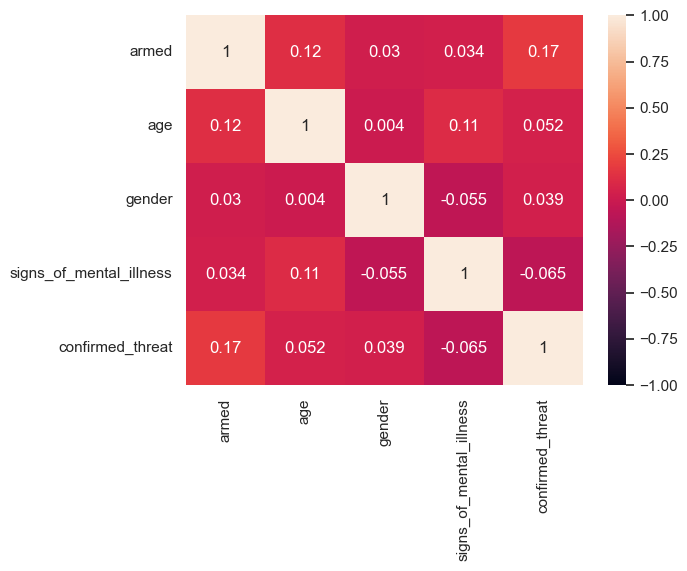

In [22]:
# Heatmap of Correlation Matrix

sns.heatmap(matrix, vmin= -1, vmax= 1, annot= True)



### Pair Plot Initial Review

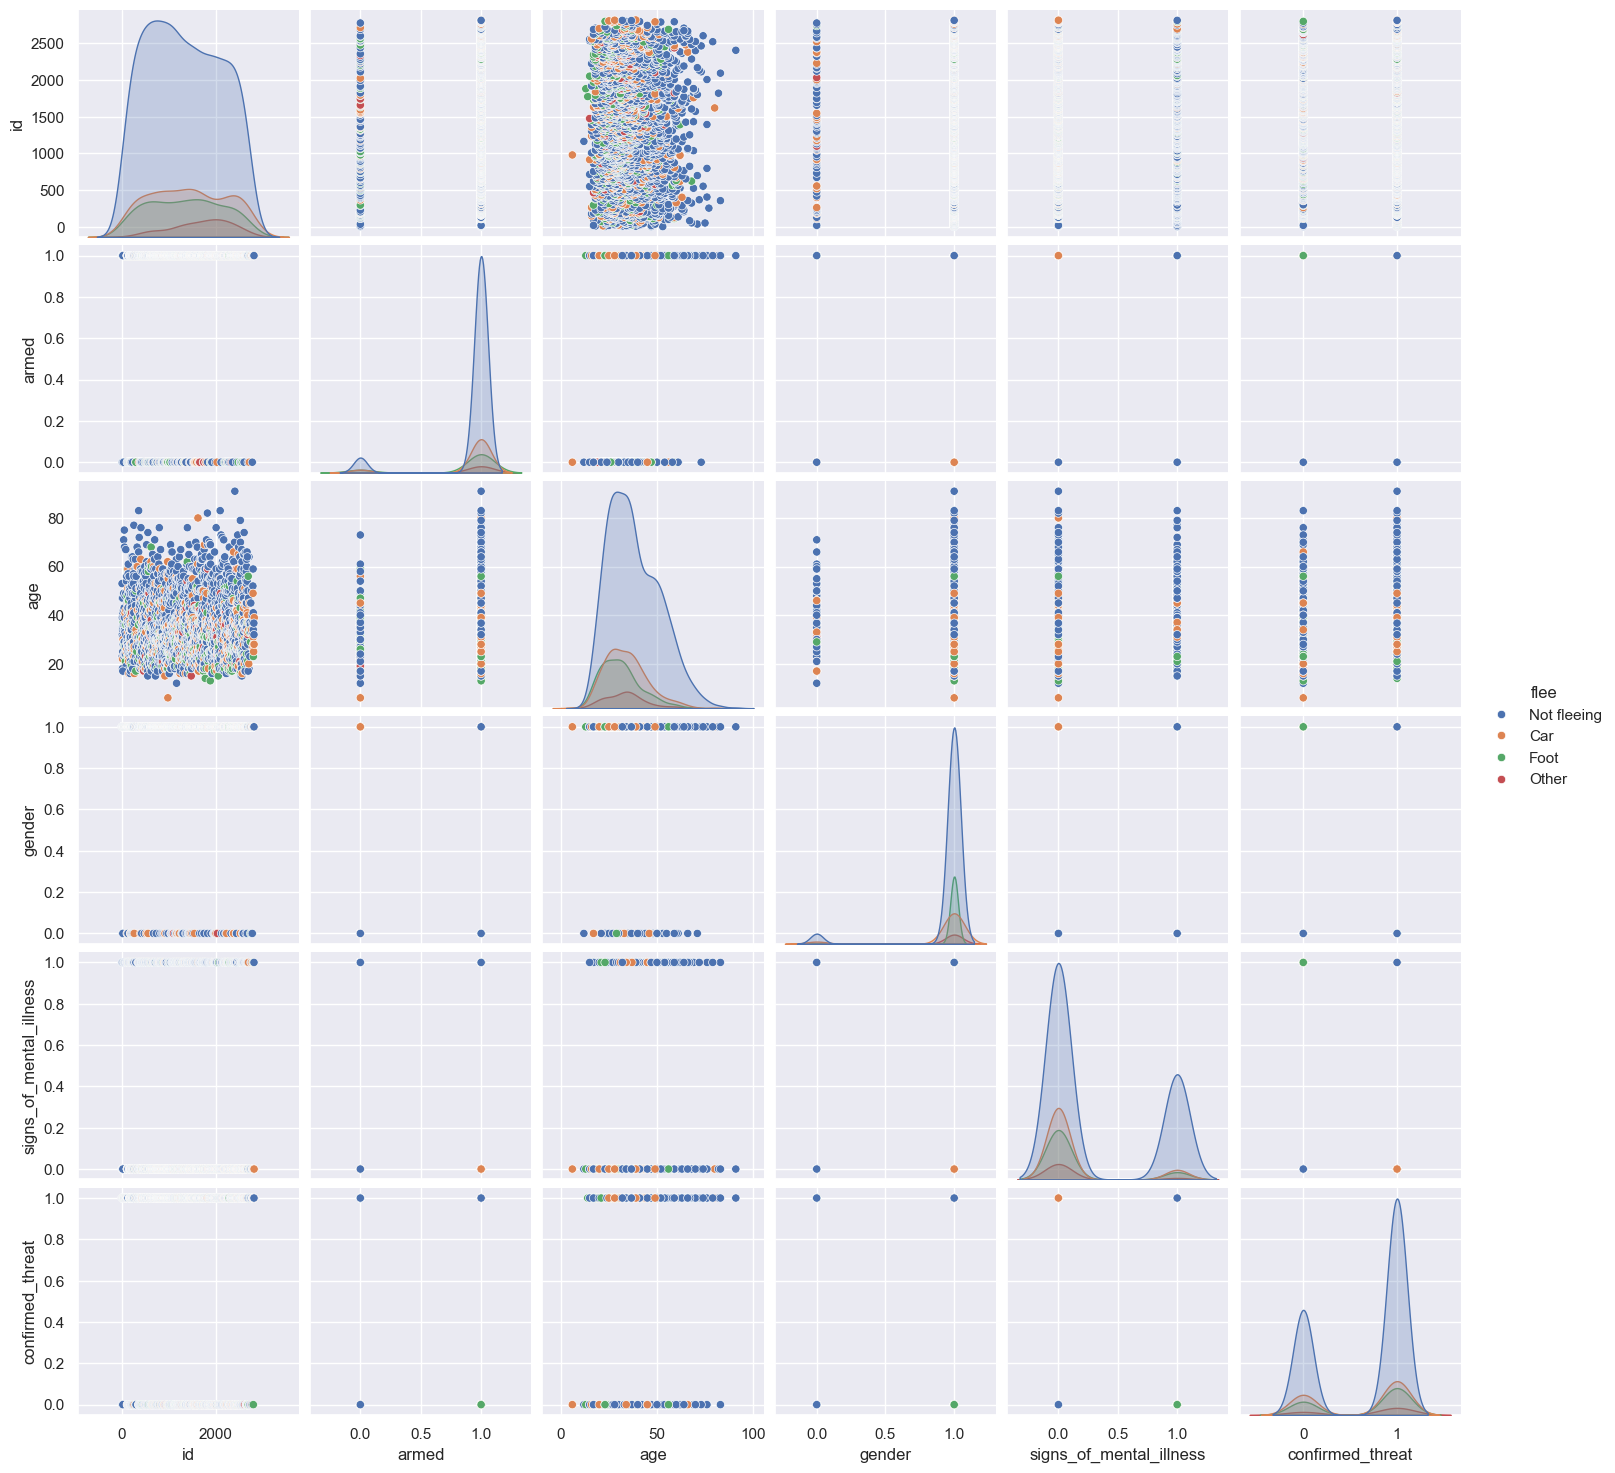

In [23]:
# Pair Plot for Visual Review of Available Values

sns.pairplot(PKUSC, hue= 'flee')



## Visualizations: Threat Status Considerations

### Histogram of Threat Status by Flight

<Axes: xlabel='confirmed_threat', ylabel='Count'>

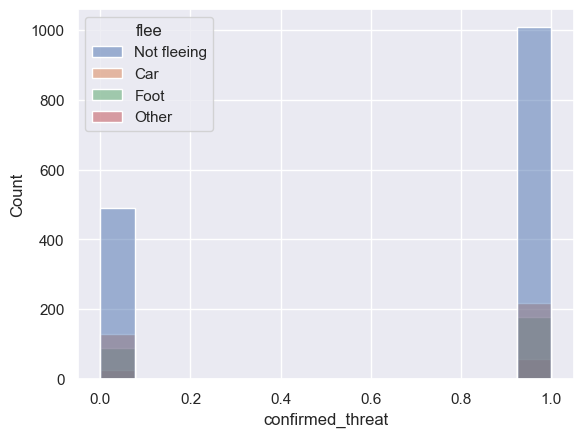

In [24]:
# Histogram to Review 'confirmed_threat' by 'flee'

sns.histplot(PKUSC, x= 'confirmed_threat', hue= 'flee')



### Strip Plot of Age by Flight and Armed Status

<Axes: xlabel='flee', ylabel='age'>

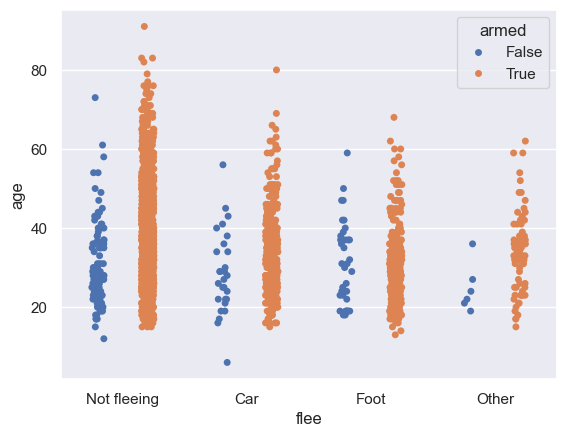

In [25]:
# Plot to Review 'age' by 'flee', 'armed'

sns.stripplot(data= PKUSC, x= 'flee', y= 'age', hue= 'armed', dodge= True)



### Bar Chart of Threat Status by Armed Status and Flight

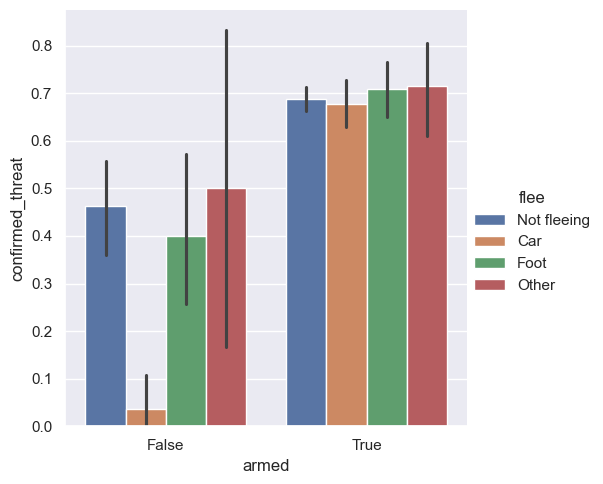

In [26]:
# Plot to Review 'confirmed_threat' by 'armed', 'flee'

sns.catplot(data= PKUSC, x= 'armed', y= 'confirmed_threat', hue= 'flee', kind= 'bar')



### Bar Chart of Threat Status by Race and Armed Status

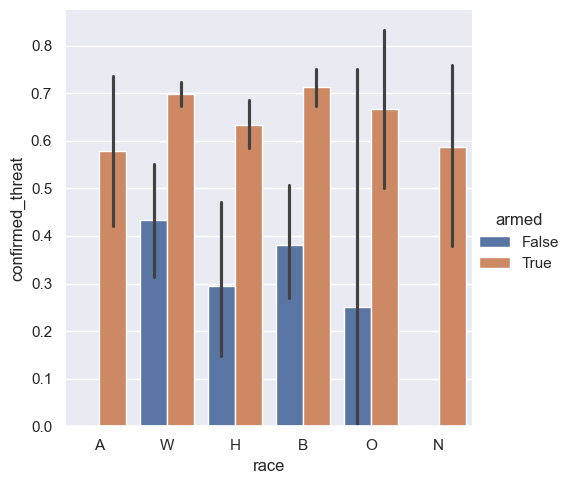

In [27]:
# Plot to Review 'confirmed_threat' by 'race', 'armed'

sns.catplot(data= PKUSC, x= 'race', y= 'confirmed_threat', hue= 'armed', kind= 'bar')

